# 1.0 Project Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/ppp

/content/drive/My Drive/ppp


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

## 1.1 Download Data

In [ ]:
#!wget https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -O crash.csv

## 1.2 Load data to pandas dataframe

In [ ]:
#load data to dataframe
df = pd.read_csv("crash.csv")

<ipython-input-7-8ebd27feecdd>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("crash.csv")


In [ ]:
#browse contents
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.000,0.000,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.000,0.000,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.000,0.000,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.000,40.667,-73.867,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.000,0.000,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.000,40.683,-73.917,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.000,0.000,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get info regarding column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139048 entries, 0 to 2139047
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

# 2.0 Data Pre-Processing

## 2.1 Format Column data

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
#
df['BOROUGH'] = df['BOROUGH'].astype('string')
df['ZIP CODE'] = df['ZIP CODE'].astype('string')
df['ON STREET NAME'] = df['ON STREET NAME'].astype('string')
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].astype('string')
df['OFF STREET NAME'] = df['OFF STREET NAME'].astype('string')
#
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype('string')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].astype('string')
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].astype('string')
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].astype('string')
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].astype('string')
#
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].astype('string')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].astype('string')
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].astype('string')
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].astype('string')
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].astype('string')

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CRASH DATE,2139048,2017-10-03 04:43:59.806119424,2012-07-01 00:00:00,2015-02-15 00:00:00,2017-06-29 00:00:00,2019-11-12 00:00:00,2024-11-30 00:00:00,NaN
LATITUDE,1899608.000,40.624,0.000,40.668,40.721,40.770,43.344,2.020
LONGITUDE,1899608.000,-73.745,-201.360,-73.975,-73.927,-73.867,0.000,3.788
NUMBER OF PERSONS INJURED,2139030.000,0.319,0.000,0.000,0.000,0.000,43.000,0.707
NUMBER OF PERSONS KILLED,2139017.000,0.002,0.000,0.000,0.000,0.000,8.000,0.041
NUMBER OF PEDESTRIANS INJURED,2139048.000,0.058,0.000,0.000,0.000,0.000,27.000,0.247
NUMBER OF PEDESTRIANS KILLED,2139048.000,0.001,0.000,0.000,0.000,0.000,6.000,0.028
NUMBER OF CYCLIST INJURED,2139048.000,0.028,0.000,0.000,0.000,0.000,4.000,0.167
NUMBER OF CYCLIST KILLED,2139048.000,0.000,0.000,0.000,0.000,0.000,2.000,0.011
NUMBER OF MOTORIST INJURED,2139048.000,0.229,0.000,0.000,0.000,0.000,43.000,0.669


Max persons injured     = 43   
Max pedestrian injured  = 27   
Max cyclist injured     = 04   
Max motorist injured    = 43

We observe that collsion is more for motorists than pedestrain and least for cyclist.

In [ ]:
df.describe(include=['string','object']).T

,count,unique,top,freq
CRASH TIME,2139048,1440,16:00,28970
BOROUGH,1475000,5,BROOKLYN,470551
ZIP CODE,1474738,427,11207.0,21849
LOCATION,1899608,297878,"(0.0, 0.0)",4677
ON STREET NAME,1680302,20297,BROADWAY,17277
CROSS STREET NAME,1323572,22031,3 AVENUE,9843
OFF STREET NAME,366373,238084,772 EDGEWATER ROAD,402
CONTRIBUTING FACTOR VEHICLE 1,2131801,61,Unspecified,722522
CONTRIBUTING FACTOR VEHICLE 2,1802601,61,Unspecified,1517571
CONTRIBUTING FACTOR VEHICLE 3,153893,52,Unspecified,143435



From the above output we observe   
 - Peak CRASH TIME	is at 16:00    
 - There are 5 BOROUGHs in New York City with BROOKLYN having highest collision   
 - Data covers area of 426 zipcodes with highest collision at zipcode 11207  
 - The streets with highest collisions are     
    - ON STREET NAME	: 	BROADWAY	     
    - CROSS STREET NAME	: 3 AVENUE	     
    - OFF STREET NAME	: 772 EDGEWATER ROAD
 - VEHICLE TYPE CODE with highest collision is Sedan   

## 2.2 Null Processing

In [ ]:
null_count=(df.isnull().sum() /df.shape[0] )*100
null_count[ null_count.values >0]

,0
BOROUGH,31.044
ZIP CODE,31.056
LATITUDE,11.194
LONGITUDE,11.194
LOCATION,11.194
ON STREET NAME,21.446
CROSS STREET NAME,38.123
OFF STREET NAME,82.872
NUMBER OF PERSONS INJURED,0.001
NUMBER OF PERSONS KILLED,0.001


We observe that many columns have Nulls > 80 %   
These columns are not very useful and can be removed

## 2.3 Null Handling ( Removal)

In [ ]:
df['ZIP CODE'] = df['ZIP CODE'].str.replace('.0','')
#
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].fillna(value=0)
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(value=0)
#
df['LATITUDE'] = df['LATITUDE'].fillna(value=0)
df['LONGITUDE'] = df['LONGITUDE'].fillna(value=0)
df['LOCATION'] = df['LOCATION'].fillna(value='(0.0, 0.0)')
#
df['BOROUGH'] = df['BOROUGH'].fillna(value= 'UNKNOWN')
df['ZIP CODE'] = df['ZIP CODE'].fillna(value= 'UNKNOWN')
#
df['ON STREET NAME'] = df['ON STREET NAME'].fillna(value= 'UNKNOWN')
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].fillna(value= 'UNKNOWN')
#
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna(value= 'Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna(value= 'Unspecified')
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna(value= 'UNKNOWN')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna(value= 'UNKNOWN')

In [ ]:
#verify nulls are removed
null_count=(df.isnull().sum() /df.shape[0] )*100
null_count[ null_count.values >0]

,0
OFF STREET NAME,82.872
CONTRIBUTING FACTOR VEHICLE 3,92.806
CONTRIBUTING FACTOR VEHICLE 4,98.364
CONTRIBUTING FACTOR VEHICLE 5,99.554
VEHICLE TYPE CODE 3,93.076
VEHICLE TYPE CODE 4,98.423
VEHICLE TYPE CODE 5,99.567


In [ ]:
# drop columns with null > 80%
df = df.drop(columns=['OFF STREET NAME',
                      'CONTRIBUTING FACTOR VEHICLE 3',
                      'CONTRIBUTING FACTOR VEHICLE 4',
                      'CONTRIBUTING FACTOR VEHICLE 5',
                      'VEHICLE TYPE CODE 3',
                      'VEHICLE TYPE CODE 4',
                      'VEHICLE TYPE CODE 5'])

In [ ]:
#drop redundant columns
df = df.drop(columns=['LATITUDE',
                      'LONGITUDE',
                      'COLLISION_ID'
                      ])

# 3.0 Feature Engineering

## 3.1 Create Column for part of Day

In [ ]:
zz = pd.to_datetime(df['CRASH TIME'],format="%H:%M")
#
bins=[pd.Timestamp('1900-01-01 00:00:00'),
      pd.Timestamp('1900-01-01 06:00:00'),
      pd.Timestamp('1900-01-01 09:00:00'),
      pd.Timestamp('1900-01-01 12:00:00'),
      pd.Timestamp('1900-01-01 15:00:00'),
      pd.Timestamp('1900-01-01 18:00:00'),
      pd.Timestamp('1900-01-01 21:00:00'),
      pd.Timestamp('1900-01-01 23:59:00')]

df['DAY_PART']= pd.cut(x= zz,
                        bins=bins,
                        labels=['before sunrise','early morning', 'morning', 'afternoon',
                            'evening', 'late evening','night'])

df['DAY_PART'].head()

,DAY_PART
0,before sunrise
1,morning
2,early morning
3,morning
4,early morning


In [ ]:
# create columns for year and month
df['CRASH_YR'] = pd.to_datetime(df['CRASH DATE']).dt.year
df['CRASH_MN'] = pd.to_datetime(df['CRASH DATE']).dt.month

#combine date and time to create CRASH_DTM
df['CRASH_DTM'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'])
df['CRASH_DTM'].describe()

,CRASH_DTM
count,2139048
mean,2017-10-03 18:19:55.314494720
min,2012-07-01 00:05:00
25%,2015-02-15 22:14:45
50%,2017-06-29 12:00:00
75%,2019-11-12 09:15:00
max,2024-11-30 23:54:00


We see that collision data has date range from 2012-07-01 to 2024-11-30   

# 4.0 EDA
## 4.1 Univariate Analysis

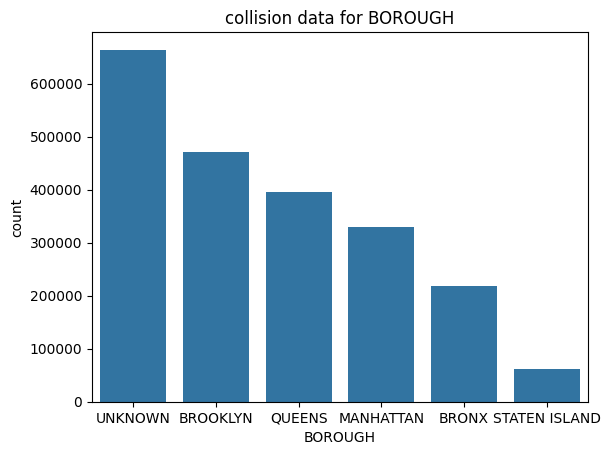

In [ ]:
sns.countplot(data=df,x='BOROUGH', order=df['BOROUGH'].value_counts().index)
plt.title("collision data for BOROUGH")
plt.show()

- Borough info for many records is not recorded
- Boroughs with top 3 collisions are
  - Brooklyn
  - Queens
  - Manhattan

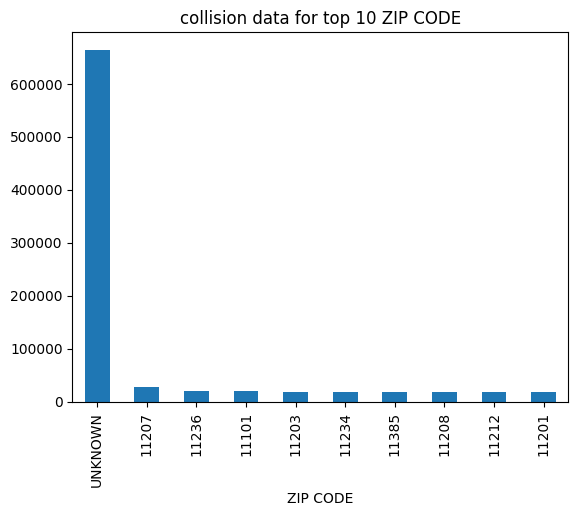

In [ ]:
df['ZIP CODE'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 ZIP CODE")
plt.show()

- ZIP CODE info for many records is not recorded
- ZIP CODE with top 3 collisions are
  - 11207
  - 11236
  - 11101

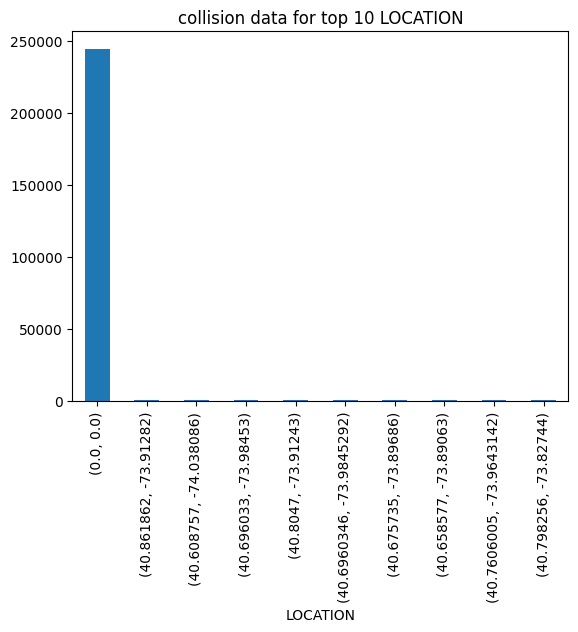

In [ ]:
df['LOCATION'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 LOCATION")
plt.show()

- LOCATION info for many records is not recorded
- LOCATION with top 3 collisions are
  - (40.86,-73.91)
  - (40.60,-74.03)
  - (40.69,-73.98)

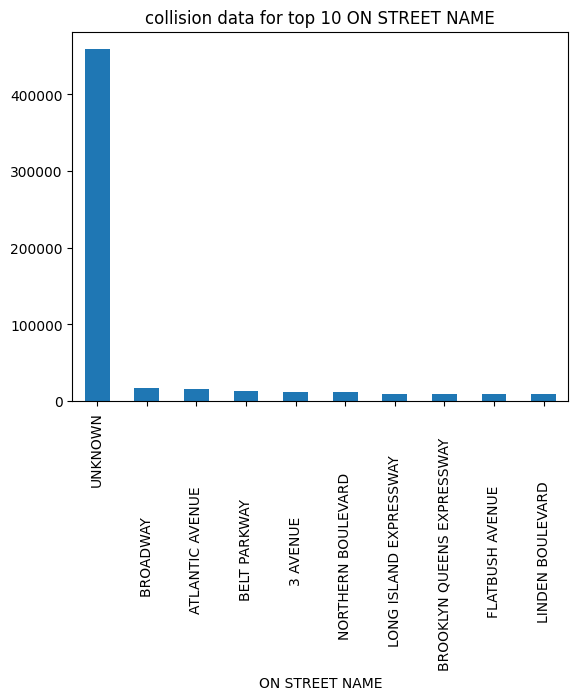

In [ ]:
df['ON STREET NAME'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 ON STREET NAME")
plt.show()

- ON STREET NAME info for many records is not recorded
- ON STREET NAME with top 3 collisions are
  - BROADWAY  
  - ATLANTIC AVENUE
  - BEKT PARKWAY  

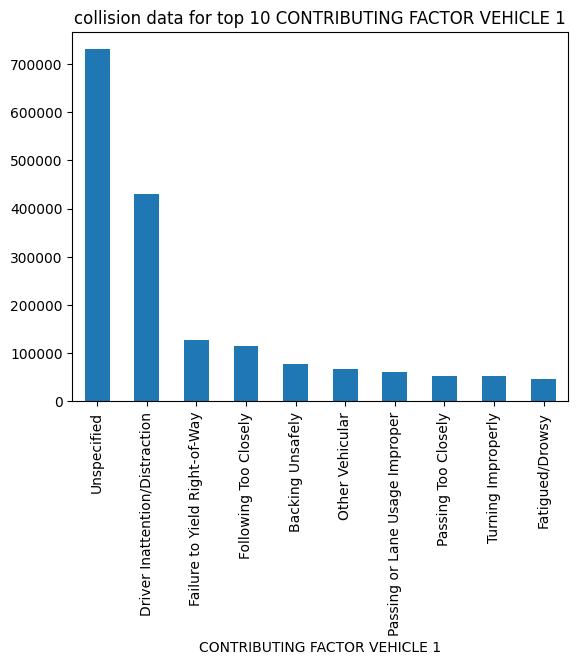

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 CONTRIBUTING FACTOR VEHICLE 1")
plt.show()

- 'CONTRIBUTING FACTOR VEHICLE 1 info for many records is not recorded
- 'CONTRIBUTING FACTOR VEHICLE 1 with top 3 collisions are
  - Driver Inattention/Distraction  
  - Failure to yirle Right-of-way
  - Following too closely  

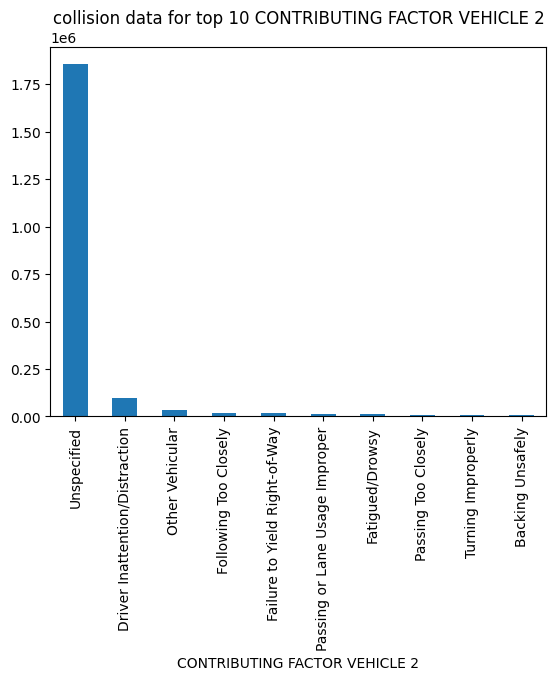

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 CONTRIBUTING FACTOR VEHICLE 2")
plt.show()

- 'CONTRIBUTING FACTOR VEHICLE 2 info for many records is not recorded
- 'CONTRIBUTING FACTOR VEHICLE 2 with top 3 collisions are
  - Driver Inattention/Distraction  
  - other vehicular  
  - Following too closely  

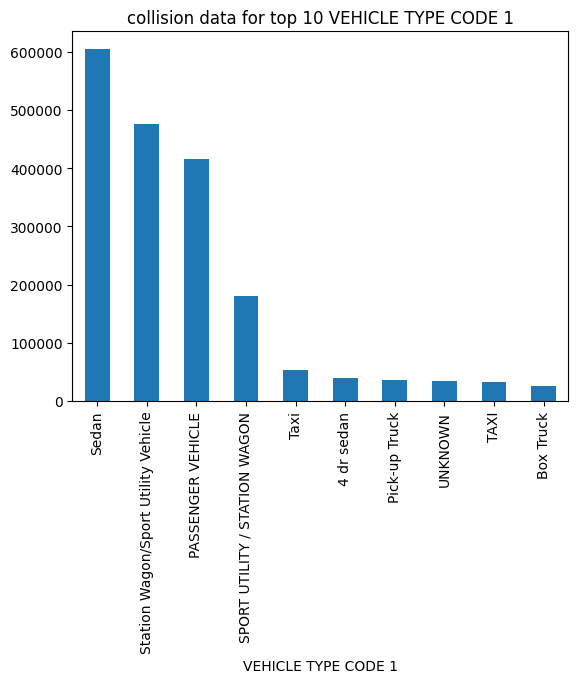

In [ ]:
df['VEHICLE TYPE CODE 1'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 VEHICLE TYPE CODE 1")
plt.show()


-  top 3 VEHICLE TYPE CODE 1 for collisions are
  - Sedan   
  - Station wagon / Sport Utility Vehicle
  - Passenger Vehicle

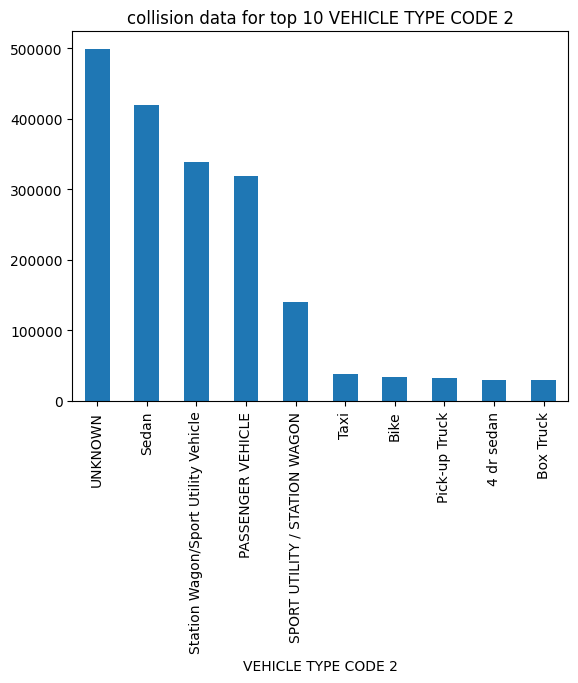

In [ ]:
df['VEHICLE TYPE CODE 2'].value_counts().nlargest(10).plot(kind='bar')
plt.title("collision data for top 10 VEHICLE TYPE CODE 2")
plt.show()


-  top 3 VEHICLE TYPE CODE 2 for collisions are
  - Sedan   
  - Station wagon / Sport Utility Vehicle
  - Passenger Vehicle

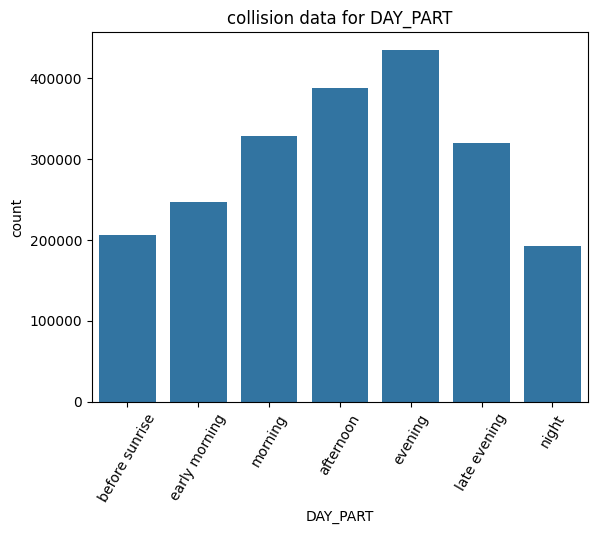

In [ ]:
sns.countplot(data=df,x='DAY_PART')
plt.title("collision data for DAY_PART")
# Rotating X-axis labels
plt.xticks(rotation = 60)
plt.show()


-  Collision increase from before sunsire to evening and then decrease
- highest collisions are in evening

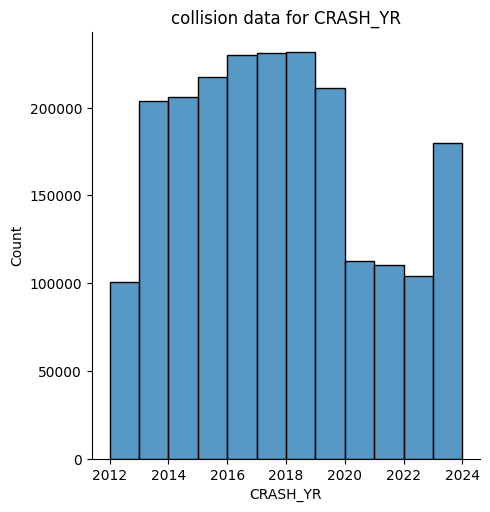

In [ ]:
sns.displot(data=df, x="CRASH_YR",binwidth=1)
plt.title("collision data for CRASH_YR")
plt.show()


-  Collision increase from 2012 to 2019  
- from 2020 there is a dip due to COVID pandemic, therefore data from 2020 to 2023 cab be ignored  

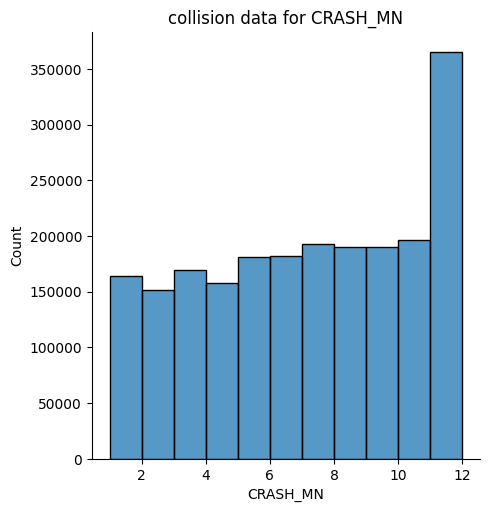

In [ ]:
sns.displot(data=df, x="CRASH_MN",binwidth=1)
plt.title("collision data for CRASH_MN")
plt.show()

- highest collisions are in December

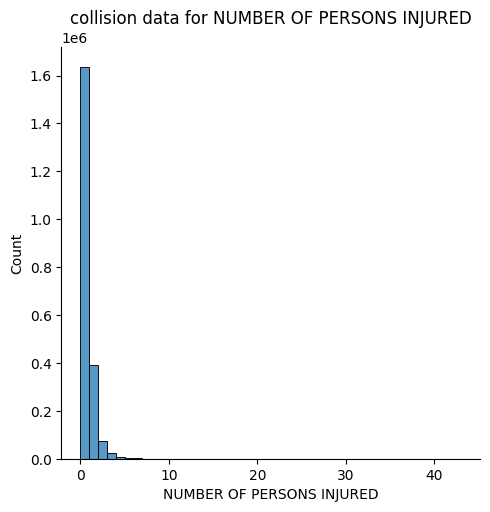

In [ ]:
sns.displot(data=df, x="NUMBER OF PERSONS INJURED",binwidth=1)
plt.title("collision data for NUMBER OF PERSONS INJURED")
plt.show()

In [ ]:
df['NUMBER OF PERSONS INJURED'].value_counts(normalize=True)

,proportion
NUMBER OF PERSONS INJURED,
0.000,0.765
1.000,0.182
2.000,0.034
3.000,0.011
4.000,0.004
5.000,0.002
6.000,0.001
7.000,0.000
8.000,0.000


 Most of persons injured is less than 6

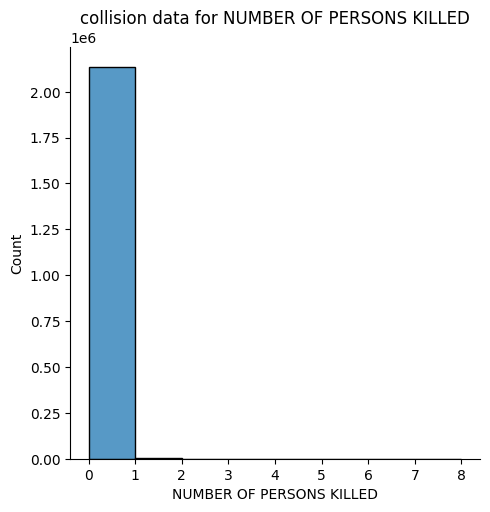

In [ ]:
sns.displot(data=df, x="NUMBER OF PERSONS KILLED",binwidth=1)
plt.title("collision data for NUMBER OF PERSONS KILLED")
plt.show()

In [ ]:
df['NUMBER OF PERSONS KILLED'].value_counts(normalize=True)

,proportion
NUMBER OF PERSONS KILLED,
0.000,0.999
1.000,0.001
2.000,0.000
3.000,0.000
4.000,0.000
5.000,0.000
8.000,0.000


 Most of persons killed is less than 2

## 4.2 Bi-Variate Analysis

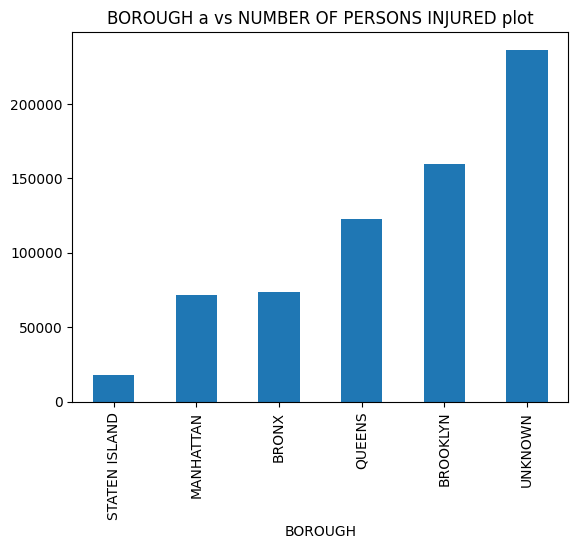

In [ ]:
df.groupby(['BOROUGH'])['NUMBER OF PERSONS INJURED'].sum().sort_values().plot(kind="bar",)
plt.title("BOROUGH a vs NUMBER OF PERSONS INJURED plot")
plt.show()


-  top 3 BOROUGH for NUMBER OF PERSONS INJURED are
  - Brooklyn     
  - Queens   
  - Bronx   

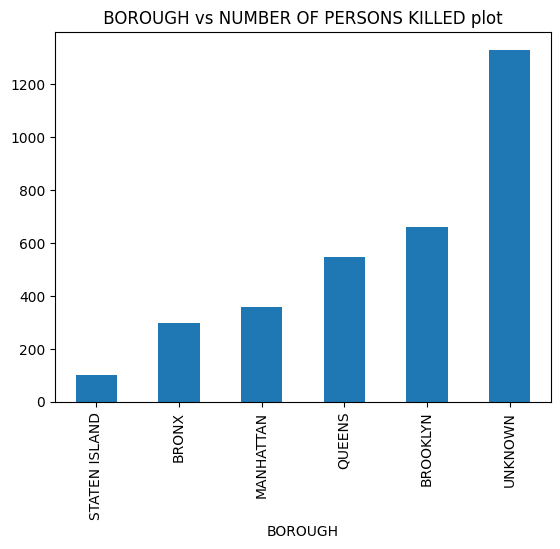

In [ ]:
df.groupby(['BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().sort_values().plot(kind="bar")
plt.title(" BOROUGH vs NUMBER OF PERSONS KILLED plot ")
plt.show()


-  top 3 BOROUGH for NUMBER OF PERSONS KILLED are
  - Brooklyn     
  - Queens   
  - Manhattan   

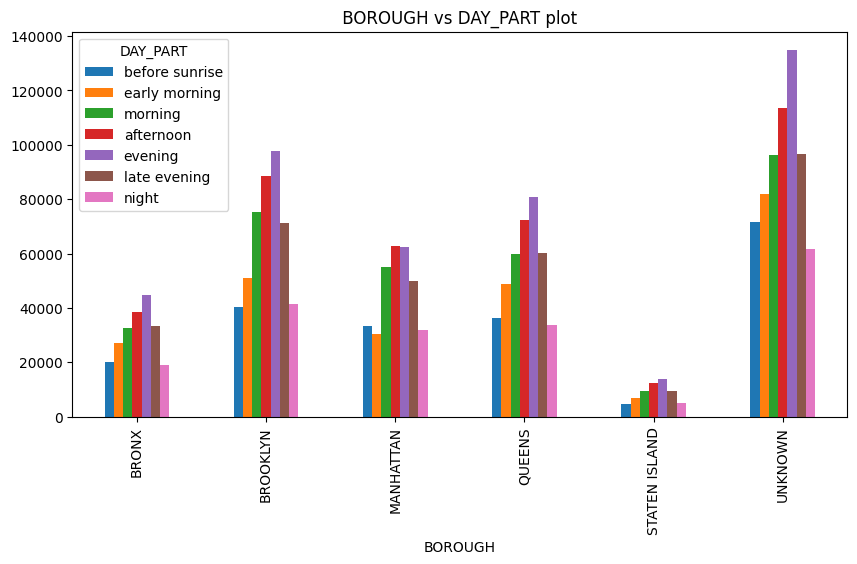

In [ ]:
pd.crosstab(df['BOROUGH'],df['DAY_PART']).plot(kind="bar",figsize=(10,5))
plt.title(" BOROUGH vs DAY_PART plot ")
plt.show()


-  In all BOROUGH, collisions increase from  before sunrise to evening and then decrease  

## 4.3 Correlation

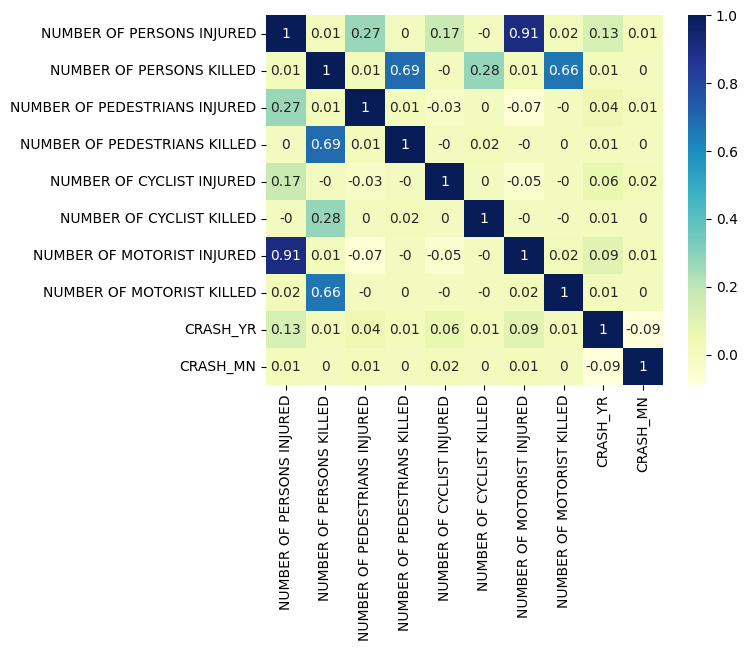

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.select_dtypes(include='number').corr().round(2), cmap="YlGnBu", annot=True)

 Heatmap shows correlation between  strong correlation between  
  NUMBER OF PERSONS INJURED & 'NUMBER OF MOTORIST INJURED     
 weak correlation between   NUMBER OF PERSONS KILLED & NUMBER OF MOTORIST KILLED   

## 4.4 Time Series Analysis  for CRASH_YR


In [ ]:
df_yr = df.groupby(['BOROUGH','CRASH_YR']).agg(
     {'NUMBER OF PERSONS INJURED': 'mean',
     'NUMBER OF PERSONS KILLED': 'mean',
     'NUMBER OF PEDESTRIANS INJURED': 'mean',
     'NUMBER OF PEDESTRIANS KILLED': 'mean',
     'NUMBER OF CYCLIST INJURED': 'mean',
     'NUMBER OF CYCLIST KILLED': 'mean',
     'NUMBER OF MOTORIST INJURED': 'mean',
     'NUMBER OF MOTORIST KILLED': 'mean',
     'LOCATION' : 'count',
     } ).rename(columns={ 'LOCATION' :'count'})


df_yr.reset_index(level=0, inplace=True)


In [ ]:
df_yr.head()

,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,count
CRASH_YR,,,,,,,,,,
2012,BRONX,0.303,0.002,0.079,0.001,0.016,0.000,0.207,0.001,9511
2013,BRONX,0.317,0.002,0.085,0.001,0.015,0.000,0.217,0.000,19768
2014,BRONX,0.299,0.001,0.076,0.001,0.018,0.000,0.204,0.000,19688
2015,BRONX,0.265,0.001,0.065,0.001,0.017,0.000,0.183,0.001,21258
2016,BRONX,0.279,0.001,0.062,0.001,0.017,0.000,0.198,0.000,21660


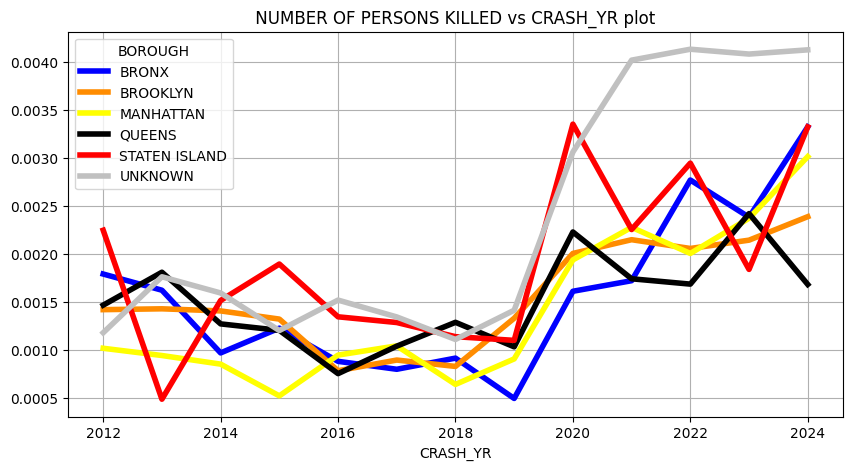

In [ ]:
df_yr.pivot(columns='BOROUGH', values='NUMBER OF PERSONS KILLED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS KILLED vs CRASH_YR plot ")
plt.grid()
plt.show()

The trend shows increase from 2019 to 2024 for all boroughs.

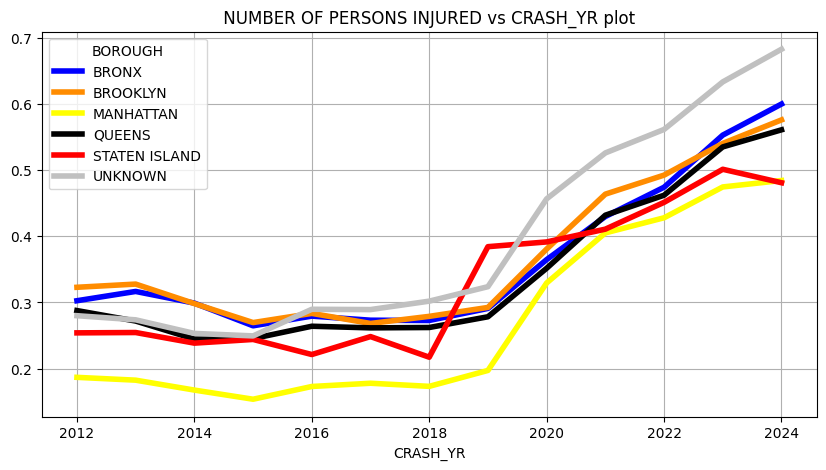

In [ ]:
df_yr.pivot(columns='BOROUGH', values='NUMBER OF PERSONS INJURED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS INJURED vs CRASH_YR plot ")
plt.grid()
plt.show()

The trend shows increase from 2018 to 2024 for all boroughs.

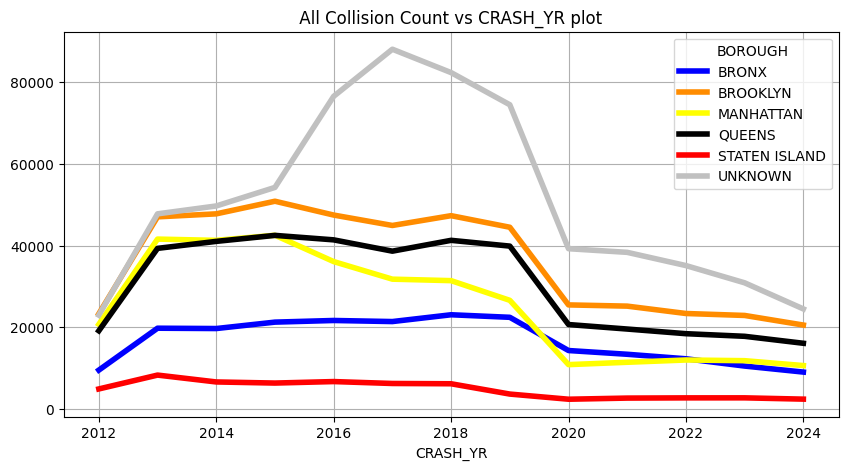

In [ ]:
df_yr.pivot(columns='BOROUGH', values='count').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])

plt.title(" All Collision Count vs CRASH_YR plot ")
plt.grid()
plt.show()

The trend shows decrease from 2018 to 2024 for all boroughs.

## 4.5 Time Series Analysis  for CRASH_MN

In [ ]:
df_mn = df.groupby(['BOROUGH','CRASH_MN']).agg(
     {'NUMBER OF PERSONS INJURED': 'mean',
     'NUMBER OF PERSONS KILLED': 'mean',
     'NUMBER OF PEDESTRIANS INJURED': 'mean',
     'NUMBER OF PEDESTRIANS KILLED': 'mean',
     'NUMBER OF CYCLIST INJURED': 'mean',
     'NUMBER OF CYCLIST KILLED': 'mean',
     'NUMBER OF MOTORIST INJURED': 'mean',
     'NUMBER OF MOTORIST KILLED': 'mean',
     'LOCATION' : 'count',
     } ).rename(columns={ 'LOCATION' :'count'})


df_mn.reset_index(level=0, inplace=True)
df_mn.head()

,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,count
CRASH_MN,,,,,,,,,,
1,BRONX,0.298,0.001,0.082,0.001,0.010,0.000,0.203,0.001,17298
2,BRONX,0.286,0.001,0.076,0.000,0.010,0.000,0.197,0.000,15863
3,BRONX,0.310,0.001,0.077,0.001,0.014,0.000,0.216,0.000,17829
4,BRONX,0.332,0.001,0.070,0.000,0.019,0.000,0.237,0.000,16227
5,BRONX,0.345,0.001,0.068,0.001,0.025,0.000,0.246,0.000,18654


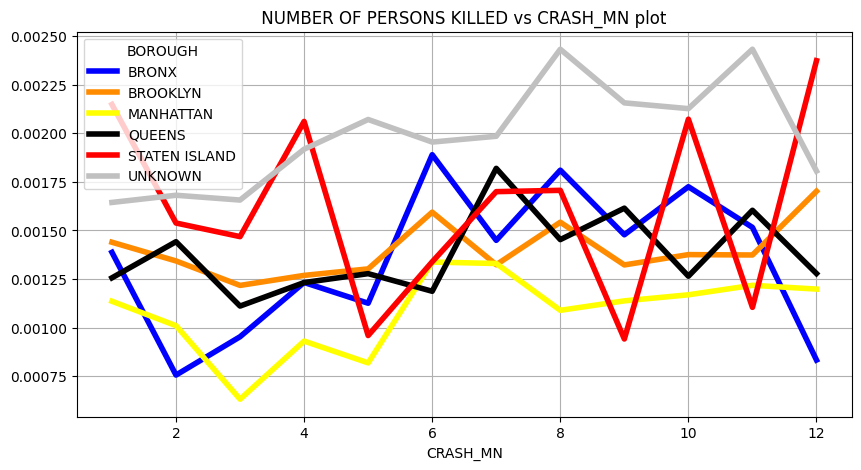

In [ ]:
df_mn.pivot(columns='BOROUGH', values='NUMBER OF PERSONS KILLED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS KILLED vs CRASH_MN plot ")
plt.grid()
plt.show()

The trend shows dip for months 03 to 05 boroughs and rise for months 06 to 11

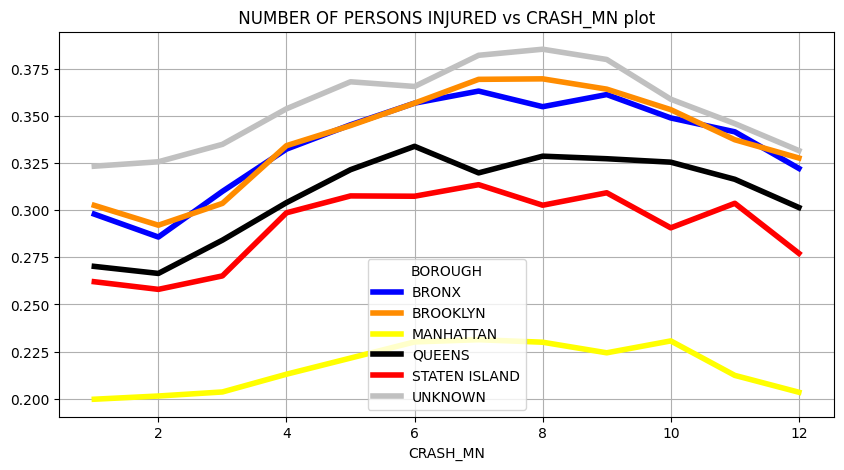

In [ ]:
df_mn.pivot(columns='BOROUGH', values='NUMBER OF PERSONS INJURED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS INJURED vs CRASH_MN plot ")
plt.grid()
plt.show()

The trend shows  rise for months 02 to 08 and
dip for months 08 to 12 boroughs   
Bronx & Brooklyn show similar trend

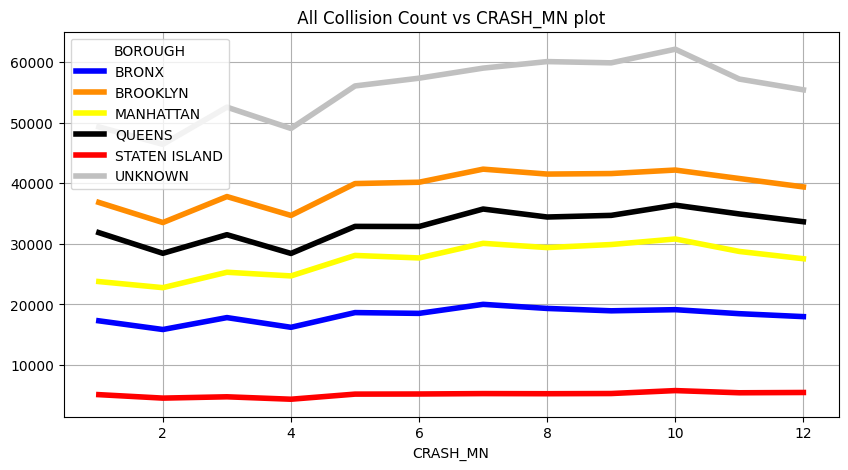

In [ ]:
df_mn.pivot(columns='BOROUGH', values='count').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])

plt.title(" All Collision Count vs CRASH_MN plot ")
plt.grid()
plt.show()

## 4.5 Time Series Analysis  for highest VEHICLE TYPE CODE (Sedan)

In [ ]:
df_sedan = df[(df['VEHICLE TYPE CODE 1']=='Sedan') &
   (df['VEHICLE TYPE CODE 2']=='Sedan')]

df_sd_yr = df_sedan.groupby(['BOROUGH','CRASH_YR']).agg(
     {'NUMBER OF PERSONS INJURED': 'mean',
     'NUMBER OF PERSONS KILLED': 'mean',
     'NUMBER OF PEDESTRIANS INJURED': 'mean',
     'NUMBER OF PEDESTRIANS KILLED': 'mean',
     'NUMBER OF CYCLIST INJURED': 'mean',
     'NUMBER OF CYCLIST KILLED': 'mean',
     'NUMBER OF MOTORIST INJURED': 'mean',
     'NUMBER OF MOTORIST KILLED': 'mean',
     'LOCATION' : 'count',
     } ).rename(columns={ 'LOCATION' :'count'})


df_sd_yr.reset_index(level=0, inplace=True)

df_sd_yr.head()


,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,count
CRASH_YR,,,,,,,,,,
2012,BRONX,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2013,BRONX,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2014,BRONX,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2015,BRONX,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3
2016,BRONX,0.288,0.000,0.004,0.000,0.000,0.000,0.284,0.000,1995


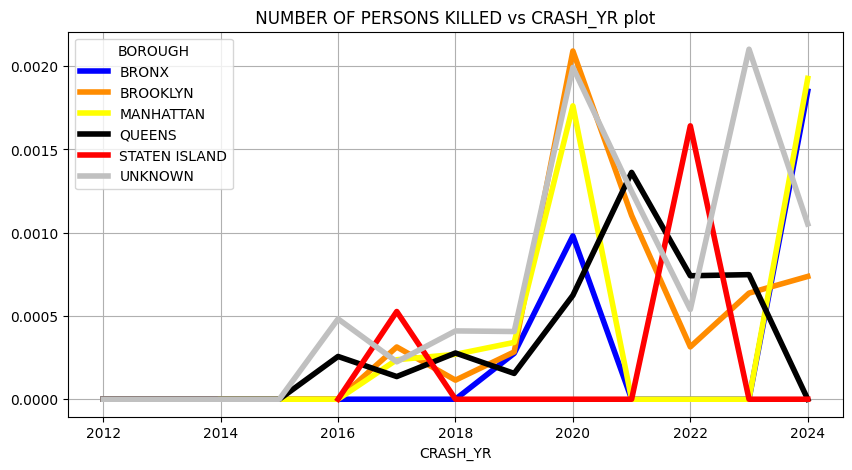

In [ ]:
df_sd_yr.pivot(columns='BOROUGH', values='NUMBER OF PERSONS KILLED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS KILLED vs CRASH_YR plot ")
plt.grid()
plt.show()


The trend show increase from 2016 to 2020  

- Staten Island  has spike in 2022
- Manhattan  has spike in 2020,2024

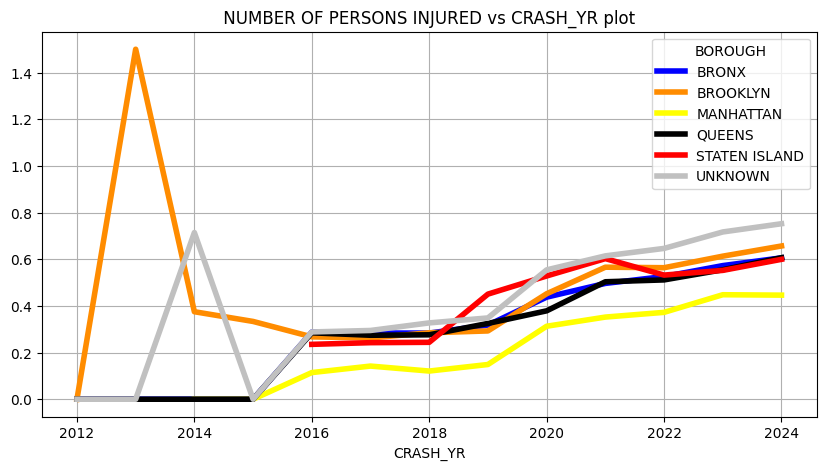

In [ ]:
df_sd_yr.pivot(columns='BOROUGH', values='NUMBER OF PERSONS INJURED').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])
plt.title(" NUMBER OF PERSONS INJURED vs CRASH_YR plot ")
plt.grid()
plt.show()


The trend show increase from 2016 to 2024  

- Brooklyn  has spike in 2013


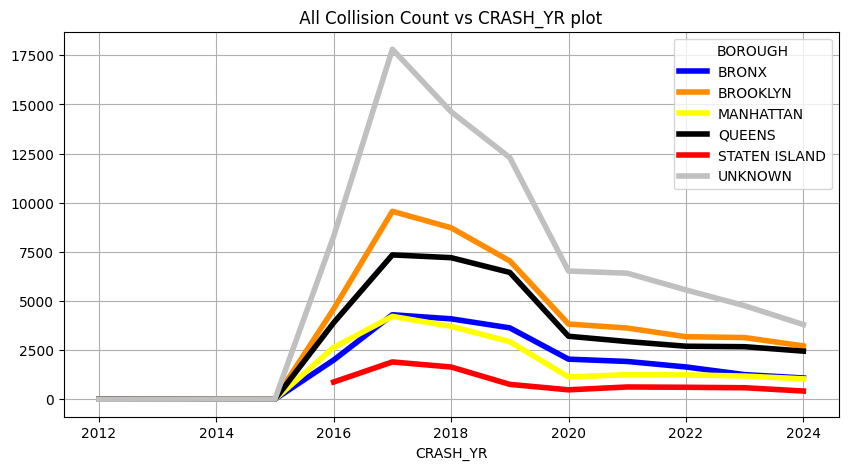

In [ ]:
df_sd_yr.pivot(columns='BOROUGH', values='count').plot(figsize=(10,5),kind='line',linewidth=4,
                                                           color=['blue','darkorange','yellow','black','red','silver'])

plt.title(" All Collision Count vs CRASH_YR plot ")
plt.grid()
plt.show()


The trend show increase from 2015 to 2017 and decrease from 2017 to 2024  




The trend is almost steady for all borough  
Brooklyn & Queens have higher counts

## 4.7 Find Collision Hot Spots

In [ ]:
# create dataframe of location hotspots
df_ln = df.groupby(['BOROUGH',
       'LOCATION'])['DAY_PART'].count().reset_index().sort_values('DAY_PART',ascending=False)
df_ln = df_ln.rename(columns={'DAY_PART': 'Count'})
# remove unwanted data
df_ln = df_ln.query("BOROUGH != 'UNKNOWN' & LOCATION != '(0.0, 0.0)'" )

# create dataframe with street info
df_lq = df[df['LOCATION'].isin(df_ln['LOCATION'])].query(
    "BOROUGH != 'UNKNOWN'").drop_duplicates('LOCATION')
# remove unwanted data
df_lq = df_lq[(df_lq['ON STREET NAME'] != 'UNKNOWN')]
# select street data
df_lq  = df_lq[['BOROUGH','ZIP CODE', 'LOCATION','ON STREET NAME', 'CROSS STREET NAME']]

#merge location and street data and select top 10 location
pd.merge(df_ln, df_lq,on=['BOROUGH','LOCATION'],how='inner').head(10).sort_values(
                 ['BOROUGH','Count',], ascending=[True, False])

,BOROUGH,LOCATION,Count,ZIP CODE,ON STREET NAME,CROSS STREET NAME
3,BRONX,"(40.861862, -73.91282)",467,10453,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY
6,BRONX,"(40.820305, -73.89083)",426,10459,BRUCKNER BOULEVARD,HUNTS POINT AVENUE
0,BROOKLYN,"(40.6960346, -73.9845292)",586,11201,TILLARY STREET,FLATBUSH AVENUE EXTENSION
1,BROOKLYN,"(40.696033, -73.98453)",509,11201,FLATBUSH AVENUE EXTENSION,TILLARY STREET
5,BROOKLYN,"(40.6757357, -73.8968533)",435,11207,ATLANTIC AVENUE,PENNSYLVANIA AVENUE
7,BROOKLYN,"(40.6585778, -73.8906229)",418,11207,LINDEN BOULEVARD,PENNSYLVANIA AVENUE
8,BROOKLYN,"(40.675735, -73.89686)",413,11207,PENNSYLVANIA AVENUE,ATLANTIC AVENUE
2,MANHATTAN,"(40.7606005, -73.9643142)",474,10022,EAST 59 STREET,2 AVENUE
4,MANHATTAN,"(40.7572323, -73.9897922)",456,10036,WEST 42 STREET,8 AVENUE
9,MANHATTAN,"(40.75898, -73.99595)",391,10036,WEST 41 STREET,10 AVENUE


From above output we observe that among top 10 hotspots in NYC
 - Brooklyn has 5  
 - Manhattan has 3    
 - Bronx has 2


# 5.0 Hypothesis Testing   
## 5.1 BOROUGH vs NUMBER OF PERSONS INJURED

 BOROUGH is categorical attribute    
NUMBER OF PERSONS INJURED is Continuous attribute   

For testing multiple(3 or more) BOROUGH with NUMBER OF PERSONS INJURED we can use ANOVA (Analysis of Variance).
Assumptions for ANOVA

Normality : Data for each groups follow normal distribution (gaussian)
Independence: the samples are independent of other samples
Homogeneity of Variance: equal variance of data in different groups

In [ ]:
# get all BOROUGHs
df['BOROUGH'].value_counts(normalize=True)

,proportion
BOROUGH,
UNKNOWN,0.310
BROOKLYN,0.220
QUEENS,0.185
MANHATTAN,0.154
BRONX,0.102
STATEN ISLAND,0.029


### 5.1.2 create sample data

In [ ]:
df_BROOKLYN = df[df['BOROUGH']=='BROOKLYN'] ['NUMBER OF PERSONS INJURED']
df_QUEENS = df[df['BOROUGH']=='QUEENS']  ['NUMBER OF PERSONS INJURED']
df_MANHATTAN = df[df['BOROUGH']=='MANHATTAN']  ['NUMBER OF PERSONS INJURED']
df_BRONX= df[df['BOROUGH']=='BRONX']  ['NUMBER OF PERSONS INJURED']
df_STATEN_ISLAND = df[df['BOROUGH']=='STATEN ISLAND']  ['NUMBER OF PERSONS INJURED']
#

In [ ]:
df_BROOKLYN.describe()

,NUMBER OF PERSONS INJURED
count,470551.000
mean,0.339
std,0.717
min,0.000
25%,0.000
50%,0.000
75%,1.000
max,43.000


In [ ]:
df_BRONX.describe()

,NUMBER OF PERSONS INJURED
count,218295.000
mean,0.336
std,0.735
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,31.000


In [ ]:
df_MANHATTAN.describe()

,NUMBER OF PERSONS INJURED
count,328674.000
mean,0.218
std,0.536
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,27.000


In [ ]:
df_QUEENS.describe()

,NUMBER OF PERSONS INJURED
count,395650.000
mean,0.309
std,0.686
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,34.000


In [ ]:
df_STATEN_ISLAND.describe()

,NUMBER OF PERSONS INJURED
count,61830.000
mean,0.292
std,0.696
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,25.000


In [ ]:
#create random sample from data
b1= df_BROOKLYN.sample(1000)
b2 = df_QUEENS.sample(1000)
b3 = df_MANHATTAN.sample(1000)
b4 = df_BRONX.sample(1000)
b5 = df_STATEN_ISLAND.sample(1000)

### 5.1.4 check ANOVA assumptions for Normality using shapiro test   
- H<sub>0</sub> Null Hypothesis : Sample is normal   
- H<sub>a</sub>  Alternate Hypothesis : Sample is not normal   


In [ ]:
from scipy.stats import shapiro,levene,probplot
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

In [ ]:
def check_pval(pval,alpha=0.05):
    '''
    check signifance of p-value
    default alpha=0.05
    '''
    print(f'p-value:{pval} alpha:{alpha}')
    if pval < alpha:
        print("Null Hypothesis rejected")
    else:
        print("Failed to reject Null hypothesis")

In [ ]:
#check normality
test_stat,p_val = shapiro(b1)
check_pval(p_val)

p-value:1.0240686258597981e-44 alpha:0.05
Null Hypothesis rejected


In [ ]:
#check normality
test_stat,p_val = shapiro(b2)
check_pval(p_val)

p-value:2.977095989894452e-46 alpha:0.05
Null Hypothesis rejected


In [ ]:
#check normality
test_stat,p_val = shapiro(b3)
check_pval(p_val)

p-value:2.2196987573879428e-48 alpha:0.05
Null Hypothesis rejected


In [ ]:
#check normality
test_stat,p_val = shapiro(b4)
check_pval(p_val)

p-value:2.7670274222971364e-46 alpha:0.05
Null Hypothesis rejected


In [ ]:
#check normality
test_stat,p_val = shapiro(b5)
check_pval(p_val)

p-value:5.42523456975823e-47 alpha:0.05
Null Hypothesis rejected


**Result:** samples are not normally distributed



### 5.1.5 Check Homogeneity of Variances
levene test
- H<sub>0</sub>
 Null Hypothesis : variance is same
- H<sub>a</sub>
 Alternate Hypothesis : variance is not same

In [ ]:
test_stat,p_val = levene(b1,b2,b3,b4,b5)
check_pval(p_val)

p-value:0.00026149187695589964 alpha:0.05
Null Hypothesis rejected


### 5.1.6 Hypothesis test for season  
### Setup Null & Alternate hypothesis   
Using ANOVA we can check if "season" attribute has any effect on "count" the number of cycles rented.To test this we can setup

- Null hypotheses($H_{0}$): group means are same
- Alternative hypotheses($H_{a}$): Two group means are not same

$H_{0}$  $\mu_{1}$  = $\mu_{2}$ = $\mu_{3}$ = $\mu_{4}$ = $\mu_{5}$     
$H_{a}$  $\mu_{1}$  $\neq$  $\mu_{2}$ $\neq$ $\mu_{3}$ $\neq$ $\mu_{4}$ $\neq$ $\mu_{5}$

In [ ]:
#set significance level(alpha)
alpha=0.05

#perform 2 sample t-test
test_stat,p_val = f_oneway(b1,b2,b3,b4,b5)

#check significance
check_pval(p_val,alpha)

p-value:0.00026149187695589964 alpha:0.05
Null Hypothesis rejected


### 5.1.7 Test Conclusion
ANOVA rejected null hypothesis,we can say the means are not equal with 95% confidence. So "BOROUGH" attribute has effect on "NUMBER OF PERSONS INJURED"

## 5.2 Hypothesis Testing (BOROUGH vs DAY_PART )  
- BOROUGH is categorical attribute with 5 values    
- DAY_PART is categorical attribute with 7 values   

For testing season(categorical) with weather(categorical) we can use chi-square test.

Assumptions for $\chi²$
 test of independence

- Variables are categorical   
- Observations are independent   
- Each cell is mutually exclusive   
- Expected value in each cell is at least 5 (at least in 80% of cells)   
Significance Level($\alpha$) = 0.05   


Using
 we can check if "season" attribute has any effect on "weather".

Null hypotheses($H_{0}$): variables are independent   
Alternative hypotheses($H_{a}$): variables are dependent   
Significance Level($α$
) = 0.05

In [ ]:
chi_data = pd.crosstab(df["BOROUGH"], df["DAY_PART"])
chi_data

DAY_PART,before sunrise,early morning,morning,afternoon,evening,late evening,night
BOROUGH,,,,,,,
BRONX,20038,26991,32758,38589,44884,33256,19038
BROOKLYN,40307,51155,75146,88681,97780,71131,41307
MANHATTAN,33406,30531,55019,62643,62466,49863,32043
QUEENS,36296,48716,59802,72362,80868,60168,33789
STATEN ISLAND,4540,6951,9279,12422,13940,9444,4877
UNKNOWN,71737,81940,96312,113511,134838,96509,61814


In [ ]:
#set significance level(alpha)
alpha=0.05

#perform ch-squared test
test_stat,p_val,dof,chi_out = chi2_contingency(chi_data)

#check significance
check_pval(p_val,alpha)

p-value:0.0 alpha:0.05
Null Hypothesis rejected


## 5.3 Test Conclusion  
Chi-squared test rejected null hypothesis,we can say the means are not equal with 95% confidence. So "BOROUGH" attribute is dependent on DAY_PART.   


# Conclusion
The above identified hotspots like borogh,location,streets and  time of day more precautions like policing, observing driving rules should be followed to prevent collisions.
